<a href="https://colab.research.google.com/github/padmajakunuku/infosys_springboard_internship/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ==============================================
# Exploratory Data Analysis (EDA) Pipeline
# ==============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# ------------------------------------------------
# 1. Load & Inspect Data
# ------------------------------------------------
file_path = "education_jobs_dataset_500_imputed.csv"
df = pd.read_csv(file_path)

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values per column:\n", df.isnull().sum())

Shape of dataset: (500, 8)

First 5 rows:
        Name        Education          Skill                    Certification  \
0  Person_1              BCA           HTML                Google IT Support   
1  Person_2  BSc Mathematics  Data Analysis                              NaN   
2  Person_3        BTech ECE            NaN   Embedded Systems Certification   
3  Person_4      BTech Civil        AutoCAD  Autodesk Certified Professional   
4  Person_5         BTech EE  Power Systems      Power Systems Certification   

               Job Role    Education_std Degree       Branch  
0    Software Developer              Bca    Bca          NaN  
1         Mathematician  BSc Mathematics    BSc  Mathematics  
2  Electronics Engineer        BTech Ece  BTech          Ece  
3   Structural Engineer      BTech Civil  BTech        Civil  
4   Electrical Engineer         BTech Ee  BTech           Ee  

Missing values per column:
 Name               0
Education          0
Skill             27
Certif


--- Univariate Analysis ---
Education distribution:
 Education_std
BTech Ee            61
BTech Ece           59
BSc Statistics      53
BSc Mathematics     52
BSc Physics         50
BSc Chemistry       48
BTech Cse           47
BTech Mechanical    46
BTech Civil         45
Bca                 39
Name: count, dtype: int64

Top Skills:
 Skill
Data Analysis       50
Python              33
MATLAB              31
Circuit Design      26
SQL                 25
Embedded Systems    23
Statistics          22
Manufacturing       20
Research            19
Spectroscopy        19
Name: count, dtype: int64

Top Job Roles:
 Job Role
Data Analyst            53
Statistician            31
Electrical Engineer     27
Research Scientist      26
Electronics Engineer    25
Lab Analyst             22
Lab Assistant           21
Mathematician           21
Control Engineer        20
Structural Engineer     20
Name: count, dtype: int64


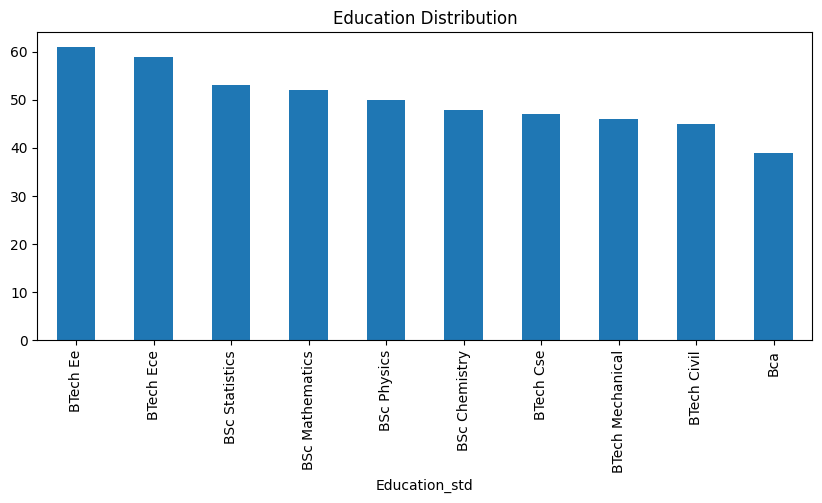

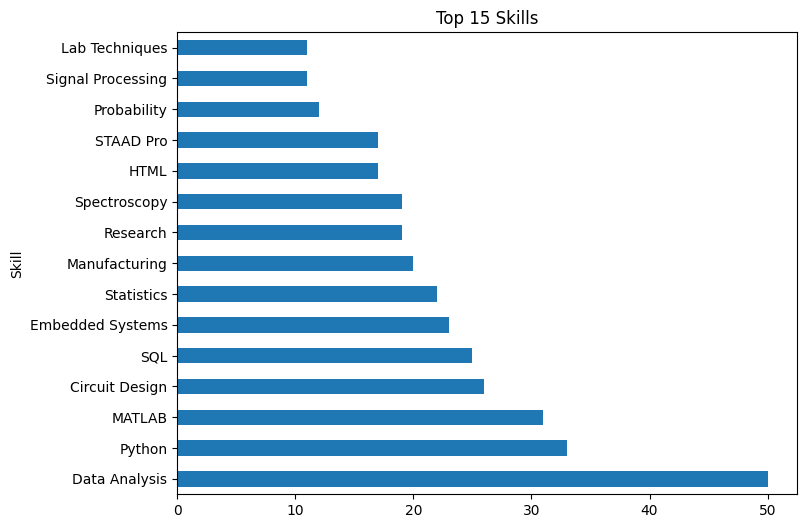

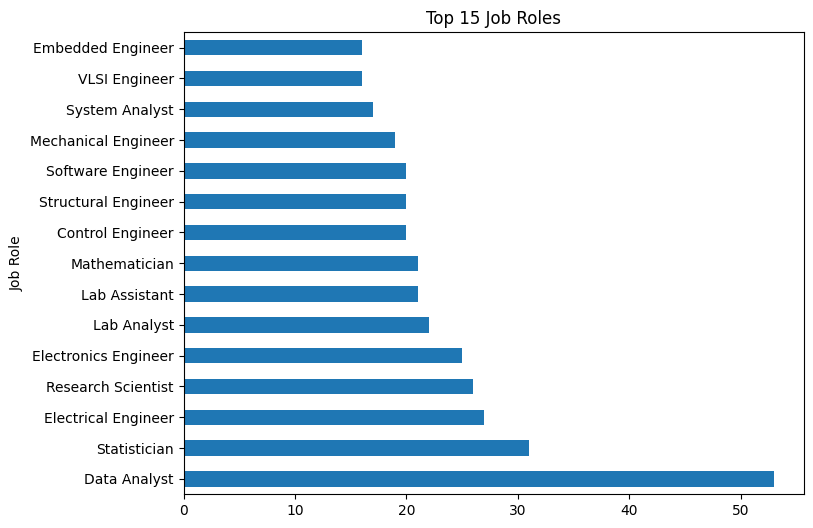

In [4]:
# ------------------------------------------------
# 2. Univariate Analysis
# ------------------------------------------------
print("\n--- Univariate Analysis ---")
print("Education distribution:\n", df['Education_std'].value_counts())
print("\nTop Skills:\n", df['Skill'].value_counts().head(10))
print("\nTop Job Roles:\n", df['Job Role'].value_counts().head(10))

# Education distribution plot
df['Education_std'].value_counts().plot(kind='bar', figsize=(10,4), title="Education Distribution")
plt.show()

# Skills distribution plot
df['Skill'].value_counts().head(15).plot(kind='barh', figsize=(8,6), title="Top 15 Skills")
plt.show()

# Job Role distribution plot
df['Job Role'].value_counts().head(15).plot(kind='barh', figsize=(8,6), title="Top 15 Job Roles")
plt.show()


--- Bivariate Analysis ---

Education vs Job Role:
 Job Role         Backend Developer  Business Analyst  Chemist  Civil Engineer  \
Education_std                                                                   
BSc Chemistry                    0                 0       13               0   
BSc Mathematics                  0                 0        0               0   
BSc Physics                      0                 0        0               0   
BSc Statistics                   0                13        0               0   
BTech Civil                      0                 0        0              13   

Job Role         Control Engineer  Data Analyst  Data Scientist  \
Education_std                                                     
BSc Chemistry                   0             0               0   
BSc Mathematics                 0            14               0   
BSc Physics                     0            14               0   
BSc Statistics                  0           

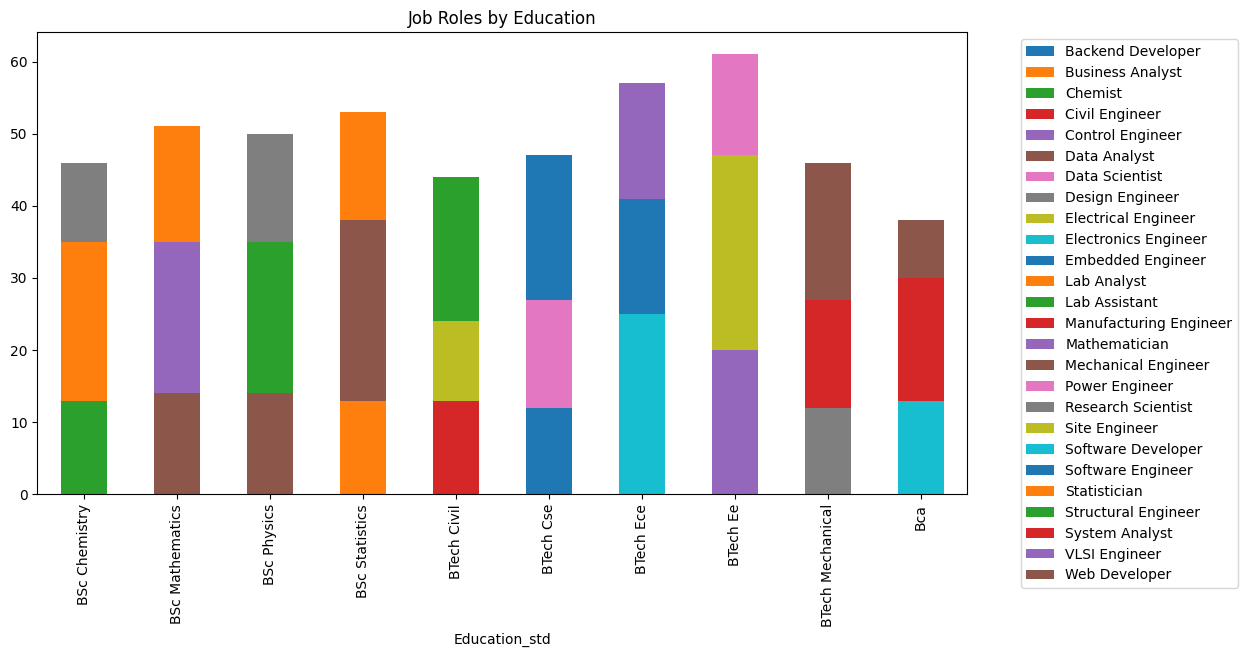

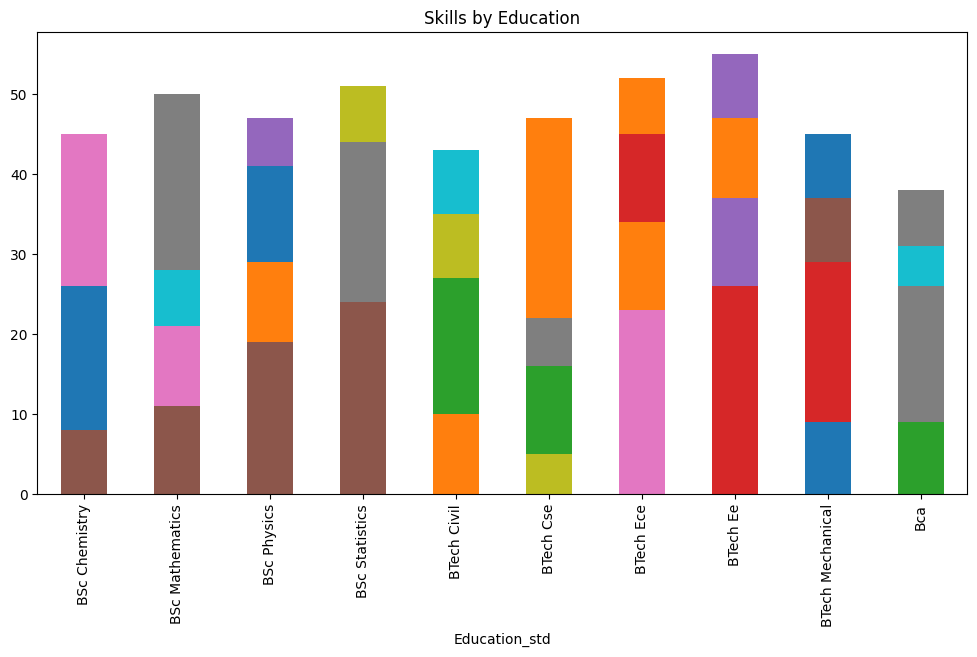

In [5]:
# ------------------------------------------------
# 3. Bivariate Analysis
# ------------------------------------------------
print("\n--- Bivariate Analysis ---")

# Education vs Job Role
pivot_job = pd.crosstab(df['Education_std'], df['Job Role'])
print("\nEducation vs Job Role:\n", pivot_job.head())

pivot_job.plot(kind='bar', stacked=True, figsize=(12,6), title="Job Roles by Education")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Education vs Skill
pivot_skill = pd.crosstab(df['Education_std'], df['Skill'])
pivot_skill.plot(kind='bar', stacked=True, figsize=(12,6), title="Skills by Education")
plt.legend([],[], frameon=False)  # hide legend
plt.show()


--- Correlation Analysis ---
       Experience_years
count        500.000000
mean           7.446000
std            4.553741
min            0.000000
25%            4.000000
50%            7.000000
75%           11.000000
max           15.000000

Correlation matrix:
                   Experience_years
Experience_years               1.0


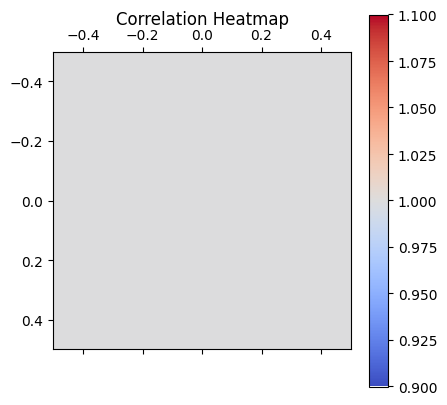

In [6]:
# ------------------------------------------------
# 4. Correlation Analysis
# ------------------------------------------------
print("\n--- Correlation Analysis ---")

# Add simulated Experience if not available
if 'Experience_years' not in df.columns:
    df['Experience_years'] = np.random.randint(0, 16, size=len(df))

print(df[['Experience_years']].describe())

# Correlation matrix
corr = df[['Experience_years']].corr()
print("\nCorrelation matrix:\n", corr)

plt.matshow(corr, cmap='coolwarm')
plt.colorbar()
plt.title("Correlation Heatmap", pad=20)
plt.show()



--- Pairwise Relationships ---


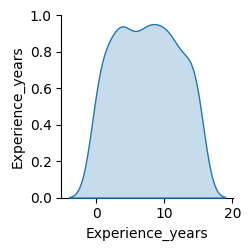

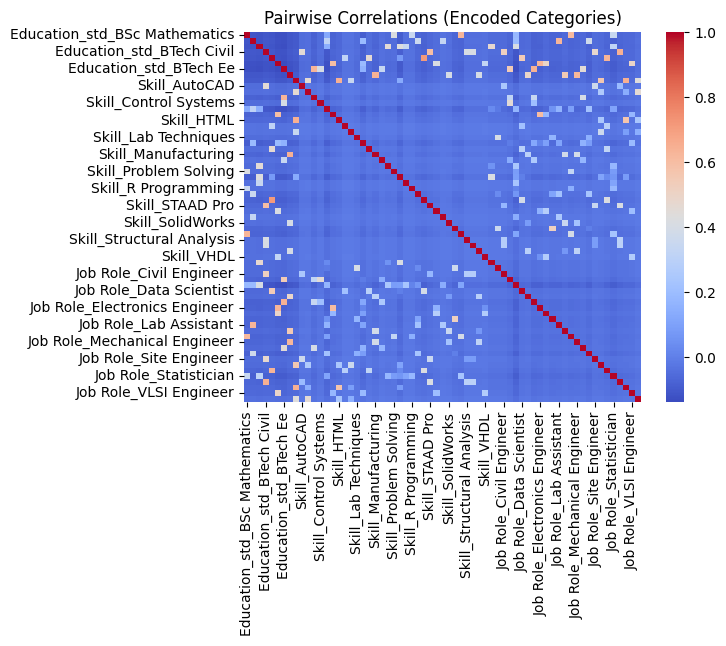

In [7]:
# ------------------------------------------------
# 5. Pairwise Relationships
# ------------------------------------------------
print("\n--- Pairwise Relationships ---")
sns.pairplot(df[['Experience_years']], diag_kind='kde')
plt.show()

# Optional: one-hot encode categories for correlation
df_enc = pd.get_dummies(df[['Education_std','Skill','Job Role']], drop_first=True)
sns.heatmap(df_enc.corr(), cmap="coolwarm")
plt.title("Pairwise Correlations (Encoded Categories)")
plt.show()



--- Handle Missing Values & Outliers ---
Remaining missing values:
 Name                  0
Education             0
Skill                27
Certification       142
Job Role              7
Education_std         0
Degree                0
Branch               39
Experience_years      0
dtype: int64


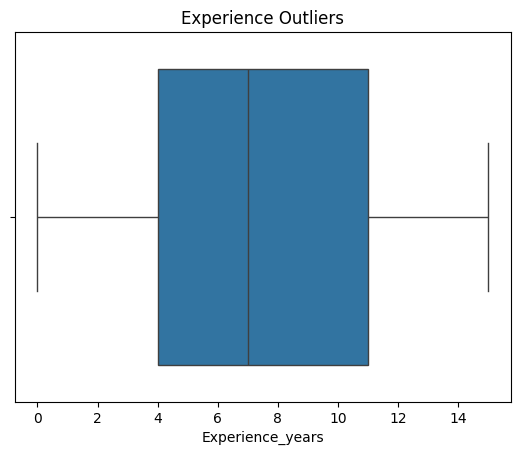

Number of outliers in experience: 0

✅ EDA Completed. Data is cleaned and ready for ML!


In [8]:
# ------------------------------------------------
# 6. Handle Missing Values & Outliers
# ------------------------------------------------
print("\n--- Handle Missing Values & Outliers ---")

# Re-check missing after imputation
print("Remaining missing values:\n", df.isnull().sum())

# Boxplot for experience
sns.boxplot(x=df['Experience_years'])
plt.title("Experience Outliers")
plt.show()

# Detect outliers using IQR
Q1 = df['Experience_years'].quantile(0.25)
Q3 = df['Experience_years'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Experience_years'] < Q1 - 1.5*IQR) | (df['Experience_years'] > Q3 + 1.5*IQR)]
print("Number of outliers in experience:", len(outliers))

# ------------------------------------------------
# ✅ Prepares data for Machine Learning
# ------------------------------------------------
print("\n✅ EDA Completed. Data is cleaned and ready for ML!")